<a href="https://colab.research.google.com/github/pinnouse/zeroshot-unsupervised-mt/blob/main/training_curves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import required modules

In [13]:
import torch
from google.colab import drive
import matplotlib.pyplot as plt


Import model data

In [15]:
drive.mount('/content/gdrive')

device = "cuda" if torch.cuda.is_available() else "cpu"
decoder_checkpoint = torch.load('/content/gdrive/My Drive/CSC413/Project/decoder-ckpt/ckpt-Decoder-epoch-199.pt', map_location=torch.device(device))
ar_checkpoint = torch.load('/content/gdrive/My Drive/CSC413/Project/ar-ckpts/ckpt-epoch-50.pt', map_location=torch.device(device))
fr_checkpoint = torch.load('/content/gdrive/My Drive/CSC413/Project/fr-ckpts/fr-ckpt-epoch-50.pt', map_location=torch.device(device))
ja_checkpoint = torch.load('/content/gdrive/My Drive/CSC413/Project/ja-ckpts/ckpt-epoch-49.pt', map_location=torch.device(device))

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [20]:
decoder_losses = [x / 109.0 for x in decoder_checkpoint['losses']]

def plot_decoder_loss(decoder_losses):
  plt.title('Decoder Loss')
  plt.plot(decoder_losses)
  plt.xlabel('epoch')
  plt.ylabel('loss')
  plt.show()

def plot_loss(title, loss_key, ar_checkpoint, fr_checkpoint, ja_checkpoint):
  plt.title(title)
  plt.plot(ar_checkpoint[loss_key], 'b-', label='Arabic')
  plt.plot(fr_checkpoint[loss_key], 'r-', label='French')
  plt.plot(ja_checkpoint[loss_key], 'g-', label='Japanese')
  plt.legend()
  plt.xlabel('epoch')
  plt.ylabel('loss')
  plt.show()

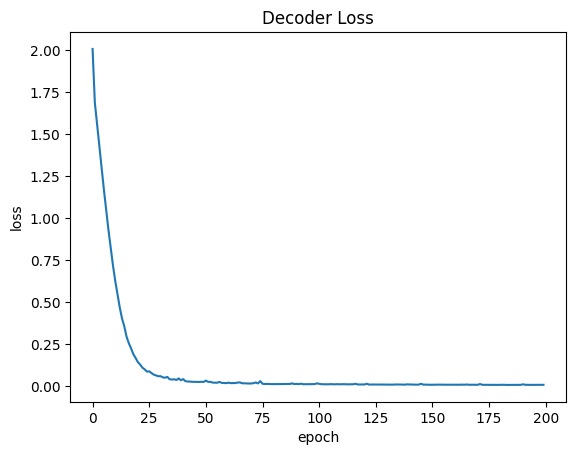

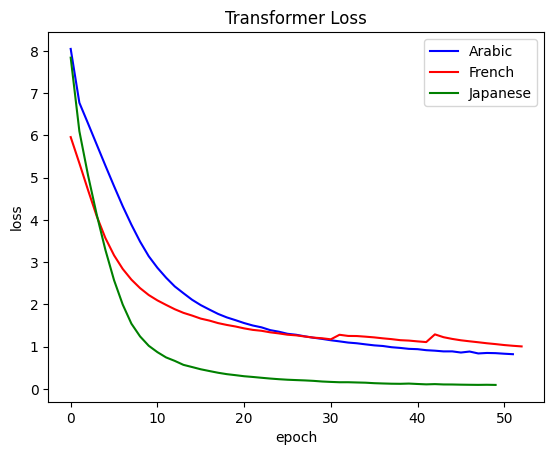

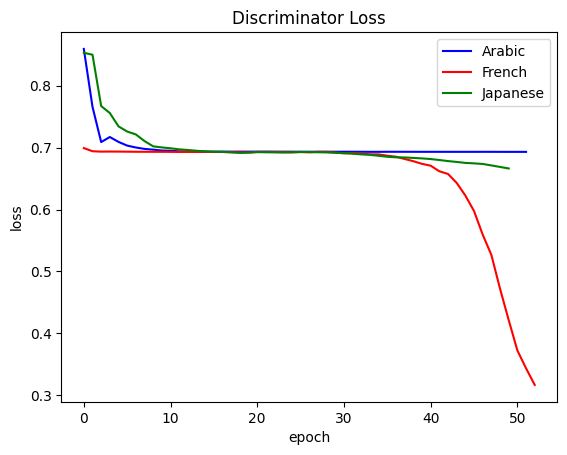

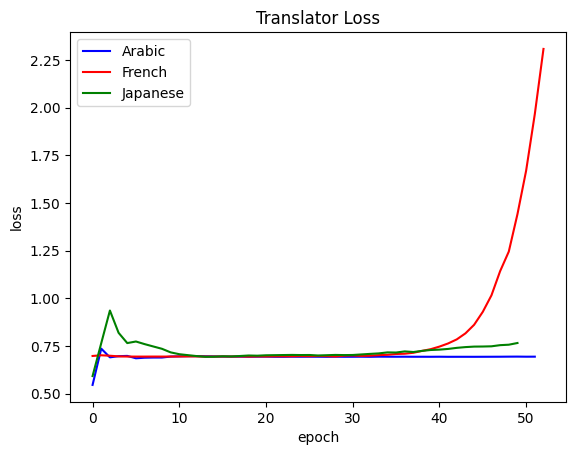

In [21]:
plot_decoder_loss(decoder_losses)
plot_loss('Transformer Loss', 'transformer_losses', ar_checkpoint, fr_checkpoint, ja_checkpoint)
plot_loss('Discriminator Loss', 'discriminator_losses', ar_checkpoint, fr_checkpoint, ja_checkpoint)
plot_loss('Translator Loss', 'translate_losses', ar_checkpoint, fr_checkpoint, ja_checkpoint)